# Batch Generation Tester
This Notebook test the generating of batches from training and validation sets.
A BatchGenerator class is used for training and a BatchSequence class for validation.

This is necessary as the training data is over 70 GB and RAM is almost never capable of loading those images all at once.

In [18]:
from os.path import join

import numpy as np
from matplotlib import pyplot as plt

from batch_generator import BatchGenerator, BatchSequence

In [10]:
datadir = 'D:\\Documenten\\Radboud University\\2017-2018\\Semester 2\\Computing Science\\Machine Learning in Practice\\Fashion\\data\\'
images_path = join(datadir, 'images/')
images_path_train = join(images_path, 'train/')
images_path_validation = join(images_path, 'validation/')

### Loading data

In [11]:
annotation_path = join(datadir, 'multilabels/')

# loading labels
y_train = np.load(join(annotation_path, 'multilabel_train.npy'))
y_validation = np.load(join(annotation_path, 'multilabel_validation.npy'))

In [15]:
def plot_image(images, images_per_row=8):
    fig, axs = plt.subplots(int(np.ceil(len(images)/images_per_row)), images_per_row)

    c = 0
    for ax_row in axs:
        for ax in ax_row:
            if c < len(images):
                ax.imshow(images[c])
            ax.axis('off')            
            c += 1
    plt.show()

(32,)
(32, 228)


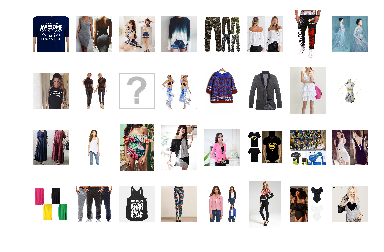

In [16]:
# testing the generator
training_gen = BatchGenerator(
    input_dir=images_path_train,
    y=y_train, 
    batch_size=32
)

for batch_x, batch_y in training_gen:
    print(batch_x.shape)
    print(batch_y.shape)
    plot_image(batch_x)
    break

(32,)
(32, 228)


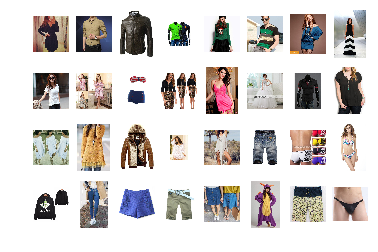

In [17]:
# Test the sequence
validation_seq = BatchSequence(
    input_dir=images_path_validation, 
    y=y_validation,
    batch_size=32
)

for batch_x, batch_y in validation_seq:
    print(batch_x.shape)
    print(batch_y.shape)
    plot_image(batch_x)
    break